In [3]:
import pandas as pd
#加载数据
train = pd.read_csv('./train.csv')
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [4]:
#转化为pandas的Datetime格式并将Datetime作为索引
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Datetime

In [5]:
train.drop(['ID','Datetime'],axis=1,inplace=True)
print(train.head())

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [6]:
#将数据按照天进行处理
daily_train = train.resample('D').sum()
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis=1,inplace=True)
print(daily_train.head())

                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [8]:
from fbprophet import Prophet
#模型训练
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
#对未来交通流量预测
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
print(forecast)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -686.475171  -2246.984985    120.281879   -686.475171   
1   2012-08-26   -678.372660  -2400.943742    -95.660935   -678.372660   
2   2012-08-27   -670.270149   -911.761367   1597.655021   -670.270149   
3   2012-08-28   -662.167638   -656.312070   1625.808757   -662.167638   
4   2012-08-29   -654.065127   -758.246635   1606.529991   -654.065127   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16243.879057  15253.774943  17804.108012  15807.769126   
971 2015-04-23  16271.394404  15028.987650  17545.216632  15831.930184   
972 2015-04-24  16298.909751  14778.210974  17319.446887  15856.822340   
973 2015-04-25  16326.425097  13565.305805  16252.273727  15883.126894   
974 2015-04-26  16353.940444  13485.983075  16063.964737  15906.263092   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -686.475171     -422.261

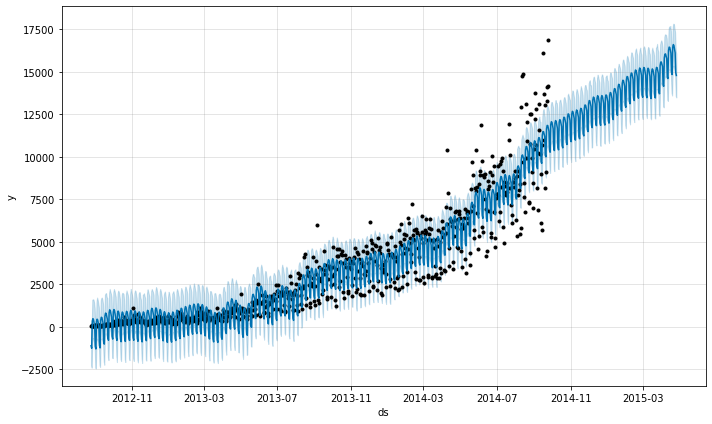

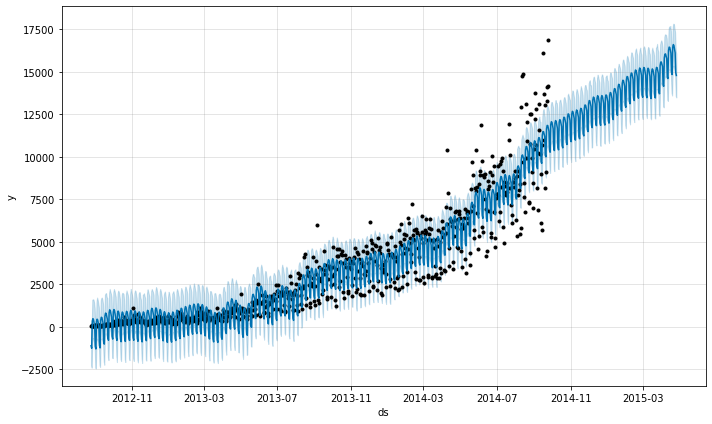

In [9]:
m.plot(forecast)

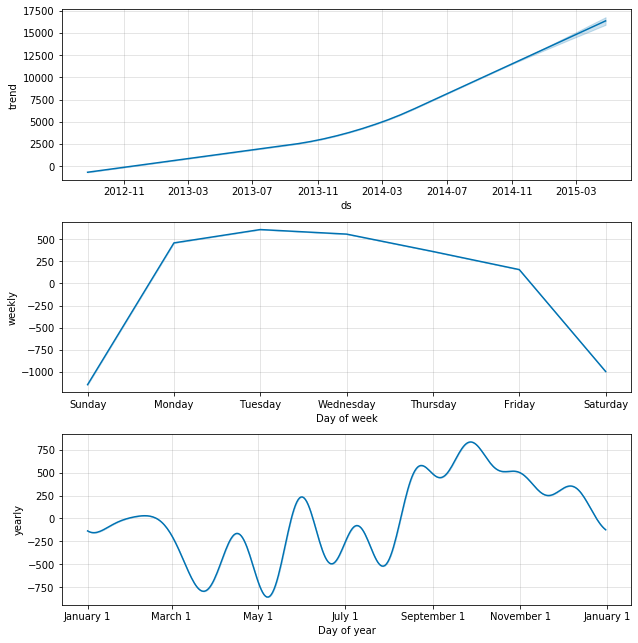

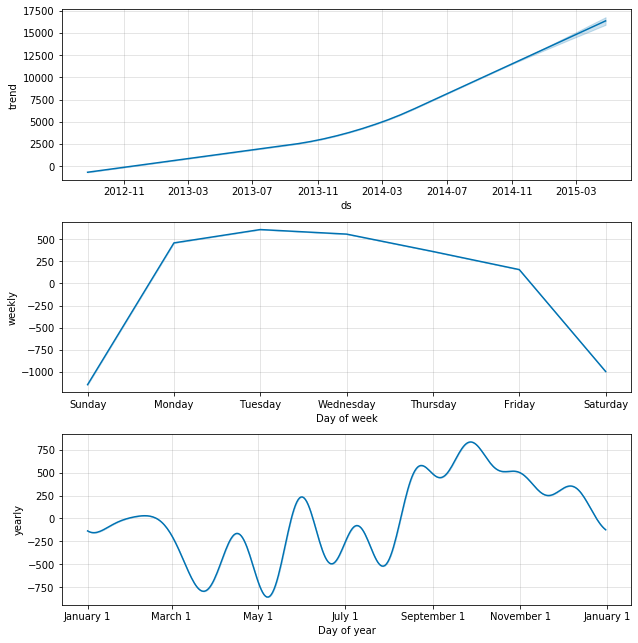

In [10]:
#查看成分
m.plot_components(forecast)